# About this notebook

15.07.2019

This notebook is based on Coursera's course "Machine learning" by Prof. Andrew Ng from Stanford University. In this course, all codes are written in Octave or Matlab. This notebook provides the Python version of the codes.

This notebook is based on the Exerxise 1. Key words are as follows:
- Linear regression with one and multiple variables
- Gradient descent
- Hypothesis h
- Cost function J
- Learning rate
- Feature normalization
- Normal equation

# Linear regression with one variable

In the first part, you will see how linear regression with one variable is implemented. 

## Preparation and visualization of data

At first, the dataset for our linear regression problem will be obtained from the file "<strong>ex1data1.txt</strong>." The training sets are named as dat, which is (m x 2)-matrix. Here, the integer m is the number of the training sets. The first and second columns of the matrix "dat" are the population of the city and the profit of a food truck in that city, respectively. The first and second columns are defined as X<sub>0</sub> and y vectors as shown below.

$$
    \mathbf{dat} =
        \left[\begin{array}{c}
            x_1^{(1)} & y^{(1)}\\
            x_1^{(2)} & y^{(2)}\\
            \vdots & \vdots \\            
            x_1^{(m)} & y^{(m)}\\
        \end{array}\right] \quad
    \boldsymbol{X_0} =
        \left[\begin{array}{c}
            x_1^{(1)} \\
            x_1^{(2)} \\
            \vdots \\            
            x_1^{(m)} \\
        \end{array}\right] \quad
    \boldsymbol{y} =
        \left[\begin{array}{c}
            y^{(1)} \\
            y^{(2)} \\
            \vdots \\            
            y^{(m)} \\
        \end{array}\right] \quad
$$

In order to perform linear regression, a new (m x 2)-matrix X is defined by adding another column to X<sub>0</sub>.

$$
    \boldsymbol{X} =
        \left[\begin{array}{c}
            x_0^{(1)} & x_1^{(1)} \\
            x_0^{(2)} & x_1^{(2)} \\
            \vdots & \vdots \\            
            x_0^{(m)} & x_1^{(m)} \\
        \end{array}\right]
        =
                \left[\begin{array}{c}
            1 & x_1^{(1)} \\
            1 & x_1^{(2)} \\
            \vdots & \vdots \\            
            1 & x_1^{(m)} \\
        \end{array}\right]\quad
$$

All procedures described above can be done by running the cell below. You can also see a scatter plot of the training dataset.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

path=os.getcwd()
datpath=path + '/ex1data1.txt'

dat = np.loadtxt(datpath) #Get data

#number of features (including theta0=1) 
n=dat.shape[1] 

X0 , y =  np.split(dat, [n-1], 1) #Seperate data into the variable matrix X0 and vector y.

X=np.insert(X0, 0, 1, axis=1) # Add 1 to the first column of the matrix X0.

# number of training sets
m=X.shape[0]

print('number of features (including theta0=1): %d'%n)
print('number of training data sets: %d'%m)


plt.figure(figsize=(8,6))
plt.scatter(X[:,1],y) #Plot data
plt.title("Scatter plot of training data",fontsize=16)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

number of features (including theta0=1): 2
number of training data sets: 97


<Figure size 800x600 with 1 Axes>

## Gradient descent

The following functions will be defined:
- Hypothesis function
- Cost function
- Gradient descent

The function "<strong>Hypothesis(Xf,theta_f)</strong>" is the hypothesis *h<sub>&theta;</sub>* (*x*) given by a linear model. In this code, this function is treated as a (m x 1)-vector.

$$
    \mathrm{Hypothesis}(Xf,\theta_f) = [\theta_f^{T} Xf^{T}]^{T},
$$

where &theta;<sub>f</sub> is the parameters of our model and written by
$$
    \boldsymbol{\theta_f} =
        \left[\begin{array}{c}
            \theta_0 \\
            \theta_1 \\
            \vdots \\            
            \theta_n \\
        \end{array}\right] \quad
$$

Here, the integer *n* is the number of features. In the case of one variable, 
$$
    n = 2
$$
and
$$
    Hypothesis[j] = \theta_0 + \theta_1 x_1^{(j)}  
$$
(j-th components of the (m x 1)-vector).

The function "<strong>CostFunctionJ</strong>" returns the cost for specific input of theta parameters. 
$$
    J=\frac{1}{2m}\sum_{i=1}^{m}\bigl(h(x^{(i)})-y^{(i)}\bigl)^{2}
$$
In a vectorized form, the above equation can be written as 
$$
    J=\frac{1}{2m}\sum_{i=1}^{m}(\boldsymbol{H}-\boldsymbol{y})^{T}(\boldsymbol{H}-\boldsymbol{y}),
$$
where 
$$
    \boldsymbol{H}=h(\boldsymbol{x})
$$




The function "<strong>GradientDescent</strong>" allows you to do the method of gradient descent and gives us the final cost after iterations and the final &theta; parameters. By adjusting these &theta; parameters, you can minimize the cost. You have to specify the number of iterations and the larning rate &alpha;. 

In every iteration of the gradien descent, &theta;<sub>j</sub> should be simultaneously updated for all *j*. 
$$
    \theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}\bigl(h(x^{(i)})-y^{(i)}\bigl)x_j^{(i)},
$$
where &alpha; is the learning rate. The equation above can be expressed using vectors as
$$
    \boldsymbol{\theta} := \boldsymbol{\theta} - \alpha \frac{1}{m}\bigl[(\boldsymbol{H}-\boldsymbol{y})^{T}\boldsymbol{x}\bigl]^{T}.
$$
When having a look at the equation above, it is nice to recall that (<strong>H</strong>-<strong>y</strong>) gives (*m* x 1)-vector, <strong>x</strong> is the (m x n)-vector, and &theta; is (n x 1)-vector. 



In [2]:
# Hypothesis function.
# This function returns m x 1 vector
def Hypothesis(Xf,theta_f):
    mf=Xf.shape[0]    
    return np.reshape((np.matmul(theta_f.T,Xf.T)).T,(mf,1)) # m x 1 vector

# Cost function.
# This function returns the cost (scalar)
def CostFunctionJ(Xf,yf,theta_f):
# X: m x n matrix, where m is the number of training set and n is the number of features
# y: m x 1 vector.
# theta: n x 1 vector 
    mf=Xf.shape[0]
    j_cost_f=Hypothesis(Xf,theta_f)-yf
    return 0.5 * np.dot(j_cost_f.T,j_cost_f) / mf

def GradientDescent(Xf,yf,theta_f,iterations_f,alpha_f):
    mf=Xf.shape[0] #number of training set
    J_f=np.zeros(iterations_f) #initialization

    for i in range(iterations_f):
        j_cost_f=Hypothesis(Xf,theta_f)-yf
        theta_f=theta_f-alpha_f/mf* (np.matmul(j_cost_f.T,Xf)).T
        J_f[i]=CostFunctionJ(Xf,yf,theta_f)

    return [J_f, theta_f] # return the change of the cost J and the final theta parameters

Since we defined all of the required functions, you can start doing the gradient descent. In order to run the calculation, you have to set the learning rate "alpha" and "iterations" that is the number of the iterations for minimizing the cost. 

In [3]:
#########
alpha=0.01
iterations = 1500
theta=np.reshape(np.zeros(n),(n,1))  # Initialization. n x 1 vector
########

print('With these conditions, the cost withought any iterations can be calculated to be J = %f'%CostFunctionJ(X,y,theta))

GD=GradientDescent(X,y,theta,iterations,alpha)

print('After %d iterations, the final cost is J = %f'%(iterations,GD[0][iterations-1]))

theta_fin=GD[1]

# Showing the obtained parameters theta
print('Determined parameters: theta0 = %0.2f, theta1 = %0.2f'%(theta_fin[0],theta_fin[1]))

With these conditions, the cost withought any iterations can be calculated to be J = 32.072734
After 1500 iterations, the final cost is J = 4.483388
Determined parameters: theta0 = -3.63, theta1 = 1.17


The convergence of the cost function will be shown by running the next cell.

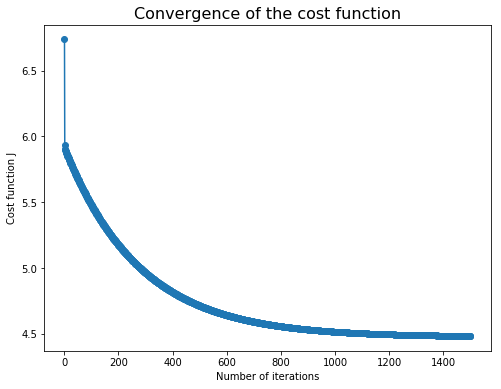

In [4]:
plt.figure(figsize=(8,6))
plt.plot(np.linspace(1,iterations,iterations),GD[0],marker='o')
plt.title("Convergence of the cost function",fontsize=16)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function J")
plt.show()

## Linear regression fit

Using the obtained $theta; parameters, it is possible to draw a line and compare with the training data. 

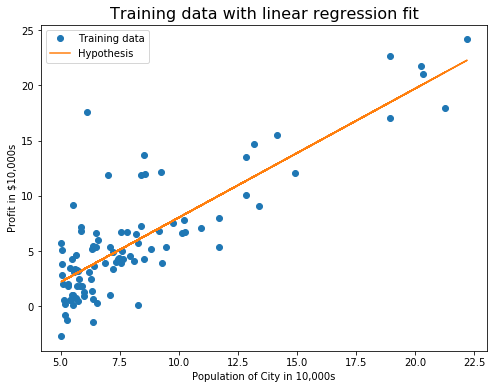

In [5]:
plt.figure(figsize=(8,6))
plt.title("Training data with linear regression fit",fontsize=16)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.plot(X[:,1],y,'o',label='Training data') #Plot data
plt.plot(X[:,1],np.matmul(theta_fin.T,X.T).T,label='Hypothesis') #Plot data
plt.legend()                                                 
plt.show()                                                              

## Visualization of the cost function J

Let us get the cost function J as a function of &theta;<sub>0</sub> and &theta;<sub>1</sub> so that we can see how the cost function J depends on these parameters. 

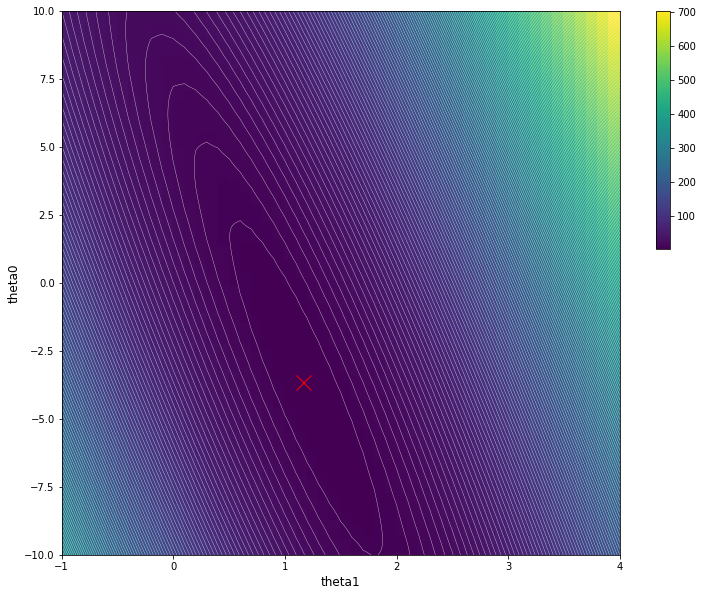

In [6]:
########
theta0min=-10
theta0max=10
theta1min=-1
theta1max=4
add_to_theta=0.1
########

theta0_num_step=int((theta0max-theta0min)/add_to_theta)+1
theta1_num_step=int((theta1max-theta1min)/add_to_theta)+1

theta=np.array((theta0min,theta1min)) # initialization
J=np.zeros((theta0_num_step,theta1_num_step)) #initialization

#preparation for data
for i in range(theta0_num_step):    
    for j in range(theta1_num_step):
        
        # Cost function J
        J[i][j]=CostFunctionJ(X,y,theta)
                
        theta=theta+(0,add_to_theta)
              
    theta=theta+(add_to_theta,0)
    theta[1]=theta1min

#Data visualization
th0=np.linspace(theta0min,theta0max,theta0_num_step)
th1=np.linspace(theta1min,theta1max,theta1_num_step)

fig, ax=plt.subplots(figsize=(10,10))
map=ax.pcolormesh(th1,th0,J,cmap='viridis')
ax.contour(th1,th0,J, colors=['white'],linewidths=0.3, levels=220)
plt.xlabel('theta1',fontsize=12)
plt.ylabel('theta0',fontsize=12)
plt.plot(theta_fin[1],theta_fin[0],marker="x", markersize=15,color='red') #Optimized theta
cbar_ax = fig.add_axes([0.95, 0.55, 0.02, 0.33])
fig.colorbar(map,cax=cbar_ax)
plt.show()

As shown above, there is an optimum position. The best &theta; parameters that give the lowest cost is shown by the red cross.

## Normal equation

There is a closed-form solution to linear regression:
$$
    \theta = (X^{T}X)^{-1}X^{T}\boldsymbol{y}.
$$
Building a code based on this formula does not require any loop calculation.

theta0 = -3.895781
theta1 = 1.193034


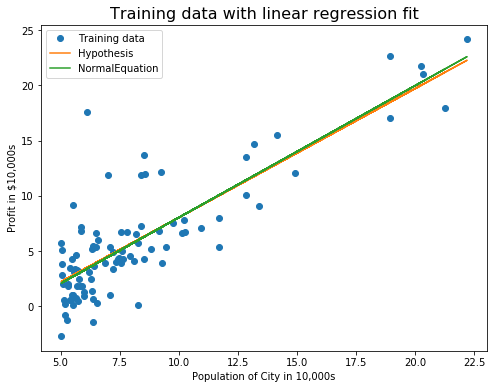

In [7]:
#normal equation
def NormalEquation(Xf,yf):
    return np.matmul(np.linalg.inv(np.matmul(Xf.T, Xf)), np.matmul(Xf.T,yf))

theta_ne=NormalEquation(X,y)

print('theta0 = %f'%theta_ne[0])
print('theta1 = %f'%theta_ne[1])

#comparison
plt.figure(figsize=(8,6))
plt.title("Training data with linear regression fit",fontsize=16)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.plot(X[:,1],y,'o',label='Training data') #Plot data
plt.plot(X[:,1],np.matmul(theta_fin.T,X.T).T,label='Hypothesis') #Plot data
plt.plot(X[:,1],np.matmul(theta_ne.T,X.T).T,label='NormalEquation') #Plot data

plt.legend()                                                                                
plt.show() 

# Linear regression with multiple variables

## Preparation of data (feature normalization)

At first, data are taken from the text file "ex1data2.txt." This file contains a training set of housing prices in Portland, Oregon. The first, second, and third columns are the size of the house in square feet, the number of bedrooms, and the price of the house, respectively. 

Our data will be obtained from the text file "ex1data2.txt." After we get the data, 1 is added to the first column of the variable matrix.

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt

path=os.getcwd()
datpath=path + '/ex1data2.txt'

dat = np.loadtxt(datpath) #Get data

#number of features (including theta0=1) 
n=dat.shape[1] 

X0 , y =  np.split(dat, [n-1], 1) #Seperate data into the variable matrix X0 and vector y.

X=np.insert(X0, 0, 1, axis=1) # Add 1 to the first column of the matrix X0.

# number of training sets
m=X.shape[0]

print('number of features (including theta0=1): %d'%n)
print('number of training data sets: %d'%m)

number of features (including theta0=1): 3
number of training data sets: 47


## Feature normalization

The values of the house sizes are about 1000 times larger than the number of bedrooms. In order to make gradient descent converge quickly, feature scaling should be performed. The feature scaling can be done by the following steps:
- Subtract the mean value of each feature from the dataset.
- Divide the obtained feature values by their respective standard deviations.

In [9]:
# Feature normalization
from statistics import mean,stdev
import copy

Xnorm=copy.deepcopy(X)
X1ave=mean(X[:,1])
X1stdv=stdev(X[:,1])
X2ave=mean(X[:,2])
X2stdv=stdev(X[:,2])

print("standard deviation of x1 = %f"%X1stdv)
print("mean of x1 = %f"%X1ave)
print("standard deviation of X1 = %f"%X2stdv)
print("mean of x2 = %f"%X2ave)

#Obtain normalized values
Xnorm[:,1]=(X[:,1]-X1ave*np.ones(m))/X1stdv
Xnorm[:,2]=(X[:,2]-X2ave*np.ones(m))/X2stdv

standard deviation of x1 = 794.702354
mean of x1 = 2000.680851
standard deviation of X1 = 0.760982
mean of x2 = 3.170213


The success of the feature scaling can be seen from the following data:

standard deviation of normalized x1 = 1.00
mean of normalized x1 = 0.00
standard deviation of normalized X2 = 1.00
mean of normalized x2 = 0.00


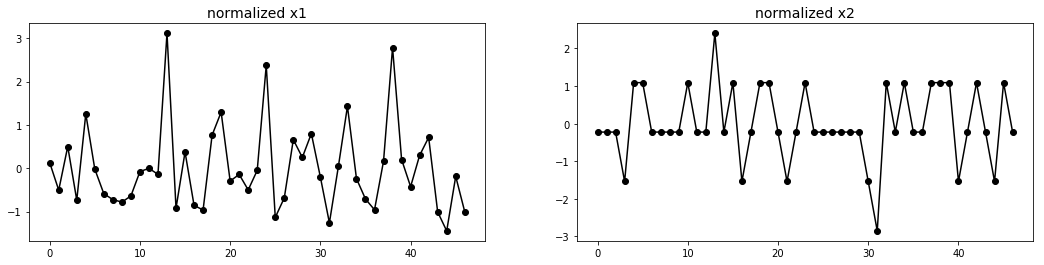

In [10]:
print ("standard deviation of normalized x1 = %0.2f"%stdev(Xnorm[:,1]))
print ("mean of normalized x1 = %0.2f"%mean(Xnorm[:,1]))
print ("standard deviation of normalized X2 = %0.2f"%stdev(Xnorm[:,2]))
print ("mean of normalized x2 = %0.2f"%mean(Xnorm[:,2]))

fig= plt.figure(figsize=(18,4)) # A figure instance is created.

ax1=fig.add_subplot(121)

ln1= ax1.plot(Xnorm[:,1],marker='o',color='black')
ax1.set_title('normalized x1', fontsize=14)

ax2=fig.add_subplot(122)
ln2=ax2.plot(Xnorm[:,2],marker='o',color='black')
ax2.set_title('normalized x2', fontsize=14)

plt.show()

## Cost function J

In [11]:
########
alpha=0.05
iterations=1500
########

theta=np.reshape(np.zeros(n),(n,1))  # Initialization. n x 1 vector
GD=GradientDescent(Xnorm,y,theta,iterations,alpha)

print('final cost J = %f'%GD[0][iterations-1])
theta_fin=GD[1]

print('Obtained hypothesis: h = theta0 + theta1 * x1 + theta2 * x2 = %f + (%f) x1 + (%f) x2'%(theta_fin[0],theta_fin[1],theta_fin[2]))
print('Expected price of a house with 1650 square feet and 3 bedrooms: $%f'%(theta_fin[0]+theta_fin[1]*(1650-X1ave)/X1stdv+theta_fin[2]*(3-X2ave)/X2stdv))


final cost J = 2043280050.602828
Obtained hypothesis: h = theta0 + theta1 * x1 + theta2 * x2 = 340412.659574 + (110631.050279) x1 + (-6649.474271) x2
Expected price of a house with 1650 square feet and 3 bedrooms: $293081.464335


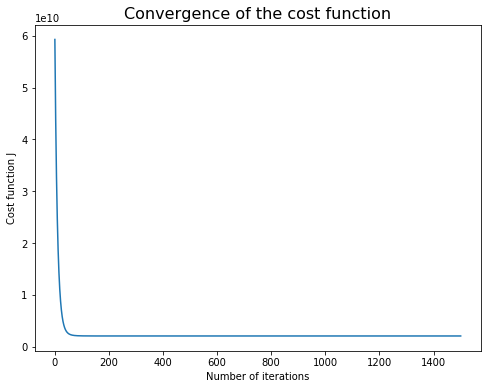

In [12]:
plt.figure(figsize=(8,6))
plt.plot(np.linspace(1,iterations,iterations),GD[0])
plt.title("Convergence of the cost function",fontsize=16)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function J")
plt.show()

The dependence of the convergence of the cost function on the learning rate will be revealed by doing the gradient descent method for several alpha values. 

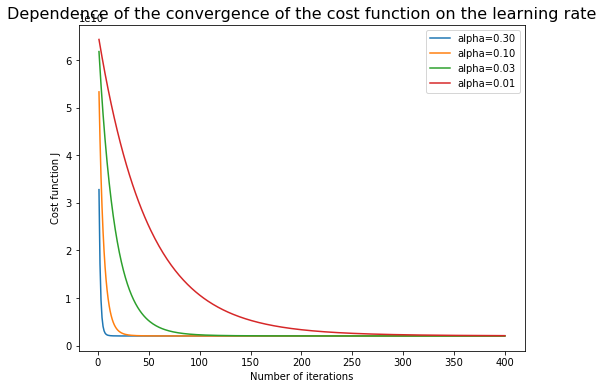

In [13]:
########
alpha=np.array([0.3,0.1,0.03,0.01])
iterations=400
########

plt.figure(figsize=(8,6))
plt.title("Dependence of the convergence of the cost function on the learning rate",fontsize=16)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function J")

for j in range(alpha.shape[0]):
    theta=np.reshape(np.zeros(n),(n,1))  # Initialization. n x 1 vector
    GD=GradientDescent(Xnorm,y,theta,iterations,alpha[j])
    GD_copy=copy.deepcopy(GD[0])
    plt.plot(np.linspace(1,iterations,iterations),GD_copy,label='alpha=%0.2f'%alpha[j])

plt.legend()
plt.show()

## Normal equation

As explained before, there is a closed-form solution to linear regression:
$$
    \theta = (X^{T}X)^{-1}X^{T}\boldsymbol{y}.
$$
Building a code based on this formula does not require any loop calculation. In addition, any feature scaling is not required. 

In [14]:
theta_ne=NormalEquation(X,y)

print('theta0=%0.2f'%theta_ne[0])
print('theta1=%0.2f'%theta_ne[1])
print('theta2=%0.2f'%theta_ne[2])

print('Calculated price of a house with 1650 square feet and 3 bedrooms: $%0.2f'%(theta_ne[0]+theta_ne[1]*1650+theta_ne[2]*3))

theta0=89597.91
theta1=139.21
theta2=-8738.02
Calculated price of a house with 1650 square feet and 3 bedrooms: $293081.46
